#**LangChain**

LangChain is a framework for developing applications powered by language models.

- GitHub: https://github.com/hwchase17/langchain
- Docs: https://python.langchain.com/en/latest/index.html




#**01: Install All the Required Packages**

https://github.com/facebookresearch/llama

In [1]:
!nvidia-smi

Mon Dec 18 11:01:02 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install -q transformers einops accelerate langchain bitsandbytes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.1/809.1 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 86.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 6.8 MB/s eta 0:00:00


#**02: Logged in with a Hugging Face account**

In a lot of cases, you must be logged in with a Hugging Face account to interact with the Hub: download private repos, upload files, create PRs,…

https://huggingface.co/docs/huggingface_hub/quick-start

In [3]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) y
Token is valid (permission: read).
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in case you want to set the 'store' credent

#**03: Import All the Required Libraries**

In [4]:
from langchain.llms import HuggingFacePipeline

AutoTokenizer. A tokenizer is responsible for preprocessing text into an array of numbers as inputs to a model.

In [5]:
from transformers import AutoTokenizer

In [6]:
import transformers

In [7]:
import torch

In [8]:
import warnings
warnings.filterwarnings('ignore')

##**04: Load the Llama 2 Model**

we are using Llama 2 Chat Model with 7 Billion Parameters

The basic building block of LangChain is a Large Language Model which takes text as input and generates more text

Suppose we want to generate a company name based on the company description. In this case, since we want the output to be more random, we will intialize our model with high temprature.

The temperature parameter adjusts the randomness of the output. Higher values like 0.7 will make the output more random, while lower values like 0.2 will make it more focused and deterministic.

temperature value--> how creative we want our model to be

0 ---> temperature it means model is  very safe it is not taking any bets.

1 --> it will take risk it might generate wrong output but it is very creative

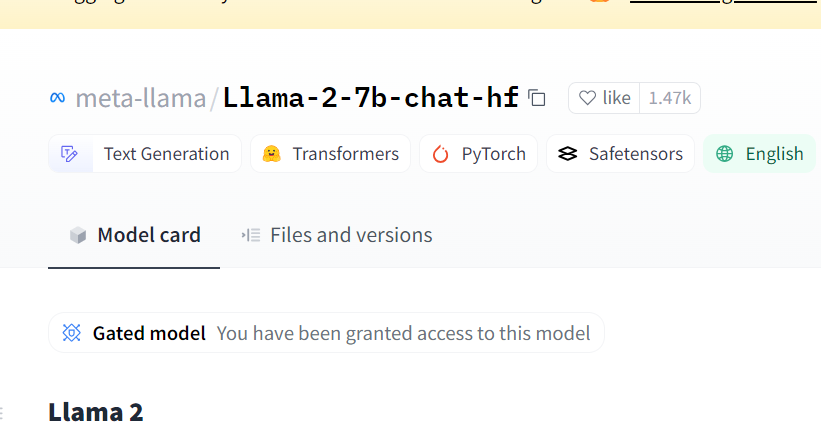

In [9]:
model="meta-llama/Llama-2-7b-chat-hf"
# model="daryl149/llama-2-7b-chat-hf"


In [10]:
tokenizer=AutoTokenizer.from_pretrained(model)

tokenizer_config.json:   0%|          | 0.00/1.62k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

### Issue: https://github.com/facebookresearch/llama/issues/374

In [11]:
pipeline=transformers.pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    torch_dtype=torch.bfloat16,
    trust_remote_code=True,
    device_map="auto",
    max_length=1000,
    do_sample=True,
    top_k=10,
    num_return_sequences=1,
    eos_token_id=tokenizer.eos_token_id
    )

config.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/188 [00:00<?, ?B/s]

In [13]:
llm=HuggingFacePipeline(pipeline=pipeline, model_kwargs={'temperature':0})

In [14]:
prompt="What would be a good name for a company that makes colorful socks"

In [15]:
print(llm(prompt))

?
A good name for a company that makes colorful socks could be something playful and catchy, like "Socktopus" or "Happy Toes." Here are a few other ideas to get you started:

1. Socktastic: This name combines the words "sock" and "fantastic," conveying a sense of excitement and fun.
2. Toes on Fire: This name plays on the idea of socks being warm and cozy, and could appeal to customers looking for a fun and quirky brand.
3. ColorFiesta: This name captures the vibrant and festive nature of colorful socks, and could be a great choice for a brand that wants to stand out.
4. SoleMates: This name plays on the idea of socks being your best friends, and could be a great choice for a brand that wants to appeal to customers who value comfort and quality.
5. Stripey Socks: This name is simple and straightforward, and could be a great choice for a brand that wants to convey a sense of fun and playfulness.
6. Hue & Cry: This name plays on the idea of socks being a fashion statement, and could be a

In [16]:
prompt="I want to open a restaurant for  indian food. Suggest me a fence name for this"

In [17]:
print(llm(prompt))

 restaurant.
Hi there! Congratulations on your decision to open an Indian food restaurant! Choosing a unique and catchy name for your restaurant is a great way to make it stand out and attract customers. Here are some suggestions for your Indian food restaurant:

1. Tandoori Nights: This name suggests a cozy and intimate atmosphere, perfect for a restaurant that specializes in Indian cuisine.
2. Spice Route: This name takes customers on a journey through the diverse and flavorful world of Indian spices.
3. Mumbai Street Food Co.: This name evokes the bustling streets of Mumbai and the delicious street food that can be found there.
4. Rajasthani Royal: This name suggests the rich and royal heritage of Rajasthan, known for its vibrant culture and delicious food.
5. Tikka Tandoor: This name plays off the popular Indian dish, tikka, and the traditional tandoor oven used to cook it.
6. Naan Stop: This name is catchy and memorable, and it immediately conveys the type of food that the restaur

##**05: Prompt Templates**

Currently in the above applications we are writing an entire prompt, if you are creating a user directed application then this is not an ideal case

LangChain faciliates prompt management and optimization.

Normally when you use an LLM in an application, you are not sending user input directly to the LLM. Instead, you need to take the user input and construct a prompt, and only then send that to the LLM.

In many Large Language Model applications we donot pass the user input directly to the Large Language Model, we add the user input to a large piece of text called prompt template

#Import All the Required Libraries

In [18]:
from langchain.prompts import PromptTemplate

In [19]:
from langchain.chains import LLMChain

#**Example 1**

In [20]:
prompt_template1=PromptTemplate(input_variables=["cuisine"],
                               template="I want to open a restaurant for {cuisine} food. Suggest a fency name for this")

In [21]:
input_prompt=prompt_template1.format(cuisine="indian")

In [22]:
print(input_prompt)

I want to open a restaurant for indian food. Suggest a fency name for this


#**Example 2**

In [23]:
prompt_template2=PromptTemplate(input_variables=["book_name"],
                               template="Provide me a concise summary of the book {book_name}")

In [24]:
input_prompt=prompt_template2.format(book_name="Alchemist")

In [25]:
print(input_prompt)

Provide me a concise summary of the book Alchemist


In [28]:
chain = LLMChain(llm=llm, prompt=prompt_template2, verbose=True)
response= chain.run("Harry Potter")
print(response)



> Entering new LLMChain chain...
Prompt after formatting:
Provide me a concise summary of the book Harry Potter

> Finished chain.
 and the Philosopher's Stone by J.K. Rowling.  I'm not interested in the plot details, but rather the themes, motifs, and symbols that are present throughout the story.  Please provide me with your analysis of the book.

Sure, I'd be happy to provide you with a summary of the themes, motifs, and symbols in Harry Potter and the Philosopher's Stone by J.K. Rowling.

Overall, the book explores the idea of the struggle between good and evil, and the importance of friendship, love, and the power of imagination. Here are some of the key themes, motifs, and symbols that are present throughout the story:

1. The struggle between good and evil: The book revolves around the conflict between the evil wizard Lord Voldemort and the good wizard Dumbledore, with Harry caught in the middle. This theme is present throughout the book and is central to the story.
2. Friends